In [1]:
%matplotlib inline

In [2]:
import h5py
import os

/usr/people/kisuk/miniconda2/envs/conda36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
dpath = '/usr/people/kisuk/Data_local/datasets/AC3AC4/AC4/AC4.seg.h5'

with h5py.File(dpath, 'r') as f:
    seg = f['/main'][...]

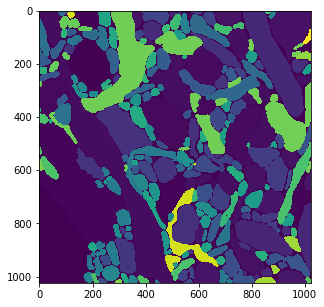

In [4]:
import matplotlib.pyplot as plt

z = 50
plt.figure(figsize=(5,5))
plt.imshow(seg[z,:,:])
plt.show()

In [14]:
import datatools

crop = seg[:,256:-256,256:-256]
aff = datatools.make_affinity(crop.astype('uint32'))

In [17]:
aff.shape

(3, 100, 512, 512)

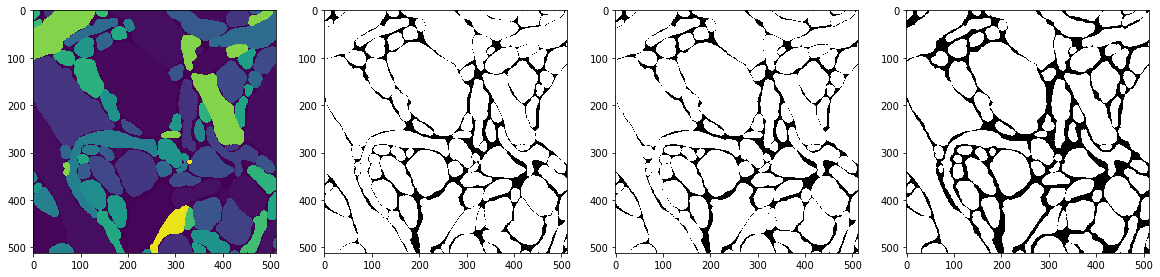

In [18]:
z = 50
plt.figure(figsize=(20,20))
plt.subplot(141)
plt.imshow(crop[z,:,:])
plt.subplot(142)
plt.imshow(aff[0,z,:,:], cmap='gray')
plt.subplot(143)
plt.imshow(aff[1,z,:,:], cmap='gray')
plt.subplot(144)
plt.imshow(aff[2,z,:,:], cmap='gray')
plt.show()

In [19]:
reseg = datatools.get_segmentation(aff)

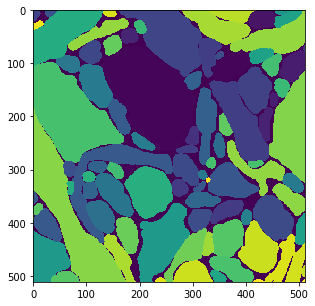

In [20]:
plt.figure(figsize=(5,5))
plt.imshow(reseg[z,:,:])
plt.show()

In [22]:
with h5py.File('datatools_seg.h5', 'w') as f:
    f.create_dataset('/main', data=reseg)

In [23]:
import skimage.measure as measure

In [24]:
reseg2 = measure.label(crop)

In [25]:
with h5py.File('skimage_seg.h5', 'w') as f:
    f.create_dataset('/main', data=reseg2)